Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [2]:
# loading the data from sklearn
breast_cancer_dataset = pd.read_csv('/Users/pragatindu/Downloads/AI-MedDiagnostics-main 3/cancer.csv')

In [3]:
print(breast_cancer_dataset)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
0            0.11840           0.27760         0.30010             0.

In [4]:
# print the first 5 rows of the dataframe
breast_cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractaldimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [8]:
print(breast_cancer_dataset.head())  # Check if 'diagnosis' exists


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
0          0.11840           0.27760          0.3001             0.14710   
1          0.08474           0.07864          0.0869             0.07017   
2          0.10960           0.15990          0.1974             0.12790   
3          0.14250           0.28390          0.2414             0.10520   
4          0.10030           0.13280          0.1980             0.10430   

   symmetry_mean  fractaldimension_mean  
0         0.2419                0.07871  
1         0.1812                0.05667  
2 

In [11]:
print(globals())  # List all defined variables in your environment

data_frame = breast_cancer_dataset.copy()

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import svm\nfrom sklearn.metrics import accuracy_score', "# loading the data from sklearn\nbreast_cancer_dataset = pd.read_csv('/Users/pragatindu/Downloads/AI-MedDiagnostics-main 3/cancer.csv')", 'print(breast_cancer_dataset)', '# print the first 5 rows of the dataframe\nbreast_cancer_dataset.head()', "# adding the 'target' column to the data frame\ndata_frame['label'] = breast_cancer_dataset.diagnosis", "print(breast_cancer_dataset.head())  # Check if 'diagnosis' exists", "print(breast_cancer_dataset.head())  # Check if 'diagnosis' exists\nprint(len(data_frame), len(breast_cancer_dataset))  # Check if they match"

In [12]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.diagnosis

In [13]:
# print last 5 rows of the dataframe
breast_cancer_dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractaldimension_mean
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884


In [14]:
# number of rows and columns in the dataset
breast_cancer_dataset.shape

(569, 11)

In [15]:
# getting some information about the data
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   diagnosis              569 non-null    object 
 1   radius_mean            569 non-null    float64
 2   texture_mean           569 non-null    float64
 3   perimeter_mean         569 non-null    float64
 4   area_mean              569 non-null    float64
 5   smoothness_mean        569 non-null    float64
 6   compactness_mean       569 non-null    float64
 7   concavity_mean         569 non-null    float64
 8   concavepoints_mean     569 non-null    float64
 9   symmetry_mean          569 non-null    float64
 10  fractaldimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [16]:
# checking for missing values
breast_cancer_dataset.isnull().sum()

diagnosis                0
radius_mean              0
texture_mean             0
perimeter_mean           0
area_mean                0
smoothness_mean          0
compactness_mean         0
concavity_mean           0
concavepoints_mean       0
symmetry_mean            0
fractaldimension_mean    0
dtype: int64

In [17]:
# statistical measures about the data
breast_cancer_dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractaldimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [18]:
# checking the distribution of Target Varibale
breast_cancer_dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [19]:
breast_cancer_dataset.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractaldimension_mean
diagnosis,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


Separating the features and target

In [20]:
X = breast_cancer_dataset.drop(columns='diagnosis', axis=1)
Y = breast_cancer_dataset['diagnosis']

In [21]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concavepoints_mean  symm

In [22]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Splitting the data into training data & Testing data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(569, 10) (455, 10) (114, 10)


Model Training

Logistic Regression

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
# training the Logistic Regression model using Training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [27]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [28]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9098901098901099


In [29]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [30]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9473684210526315


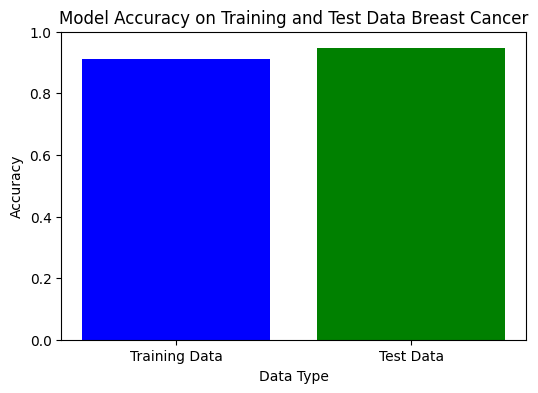

In [2]:
import matplotlib.pyplot as plt

# Accuracy values for training and test data
training_accuracy = 0.9098901098901099
test_accuracy = 0.9473684210526315

# Plotting the bar chart
accuracies = [training_accuracy, test_accuracy]
labels = ['Training Data', 'Test Data']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'green'])

# Add title and labels
plt.title('Model Accuracy on Training and Test Data Breast Cancer')
plt.xlabel('Data Type')
plt.ylabel('Accuracy')

# Display the plot
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1 for better comparison
plt.show()


Building a Predictive System

In [31]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



['B']
The Breast Cancer is Benign


/Users/pragatindu/Downloads/AI-MedDiagnostics-main 3/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the training model

In [32]:
import pickle

In [33]:
filename = 'cancer_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [34]:
# loading the saved model
loaded_model = pickle.load(open('cancer_model.sav', 'rb'))

In [35]:
for column in X.columns:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concavepoints_mean
symmetry_mean
fractaldimension_mean
